During an ML interview recently, I was asked to implement kmeans algorithm from scratch. Luckily I was able to finish it in around 35 minutes and answered the follow up questions. It has one bug at first but I fixed it after debuggging. Below is the class I implemented. I tested using several simples tests during the interview (like test case 1 and 2), and added more a complex test case (test case 3) afterwards.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [2]:
class kmeans:
    def __init__(self, k=4, tol=0.00001, max_iter=100):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    
    def fit(self, data):
        n, d = data.shape
        self.centroids = np.zeros((self.k,d))
        
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for it in range(self.max_iter):
            self.labels = {}
            
            for i in range(self.k):
                self.labels[i] = []
                
            for i, x in enumerate(data):
                distance = [np.linalg.norm(x - centroid, axis=0) for centroid in self.centroids]
                cluster_id = distance.index(min(distance))
                self.labels[cluster_id].append(i)
            
            prev_centroids = np.copy(self.centroids)
            
            for i in range(len(self.centroids)):
                self.centroids[i] = np.average(data[self.labels[i]], axis=0)
            
            optimized = True
            
            for i in range(len(self.centroids)):
                prev = prev_centroids[i]
                cur = self.centroids[i]
                
                diff = abs(np.sum(prev - cur)/np.sum(prev))
                
                if diff > self.tol:
                    optimized = False
                    
            if optimized:
                break
        
    def getCentroids(self):
        return self.centroids
    
    def getLabels(self):
        return self.labels

Test case 1

In [3]:
X = [[1,2,3],[1,3,2],[70,60,70],[60,69,71],[12,12,11],[12,11,13]]
kmeans1 = kmeans(3)
kmeans1.fit(np.array(X))
centroids = kmeans1.getCentroids()
print(centroids)  

[[12.  11.5 12. ]
 [ 1.   2.5  2.5]
 [65.  64.5 70.5]]


Test case 2

In [4]:
x1 = np.random.randn(200,2) + 5
x2 = np.random.randn(200,2) - 5
x3 = np.random.randn(100,2) + 0
x4 = np.random.randn(200,2) + 7
X = np.concatenate([x1,x2,x3,x4], axis=0)
np.random.shuffle(X)
kmeans1 = kmeans(4)
kmeans1.fit(np.array(X))
centroids = kmeans1.getCentroids()
print(centroids)  

[[ 6.95610894  6.96910516]
 [ 4.90704912  4.83885131]
 [-5.00269961 -4.98156217]
 [ 0.07126498 -0.01880197]]


Test case 3

[[ 4.00621012  4.01859115]
 [ 2.02941758 -3.05357452]
 [ 0.99860313  0.94651745]
 [-2.03218273 -1.04430503]]


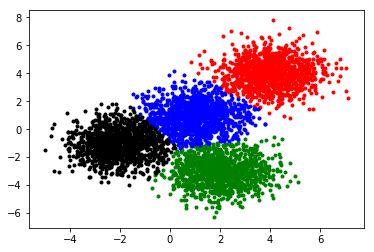

In [5]:
X,y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1],[2,-3],[1,1]], cluster_std=1.0)

kmeans1 = kmeans(4)
kmeans1.fit(np.array(X))
centroids = kmeans1.getCentroids()
print(centroids)
labels = kmeans1.getLabels()

colors = ['r','g','b','k']
for i in range(len(labels)):
    plt.scatter(X[labels[i],0], X[labels[i],1], marker='.', color=colors[i])  